In [358]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns



# Version 1:

In [359]:
df = pd.read_csv("imdb_labelled.csv", header=None)
df.columns = ['message', 'sentiment']
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index()

print(df.head())

   index                                            message  sentiment
0      0  A very, very, very slow-moving, aimless movie ...        0.0
1      1  Not sure who was more lost - the flat characte...        0.0
2      2  Attempting artiness with black & white and cle...        0.0
3      3       Very little music or anything to speak of.          0.0
4      4  The best scene in the movie was when Gerardo i...        1.0


In [360]:
#print(df.loc[300:400, ["message", "sentiment"]])

In [361]:
keywords = ['bad', 'boring','worst', 'wasted', 'insult', 'horrible', 'embarrassing', 'predictable',
            'hated', 'very', 'not', 'lost', 'average', 'problem', 'nothing', 'ridiculous', 'pretentious', 
            'long', 'suffered', 'weak', 'vomit', 'tolerate']
            
            
for key in keywords:

    df[str(key)] = df.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )


## The heat map below shows that our features are independent from each other.  Some variables, such as the words 'frustrated' and 'sabotage',were initially put into our keywords, but it had alot of correlation with the other variables, so I took them out of the model.

AxesSubplot(0.125,0.125;0.62x0.755)


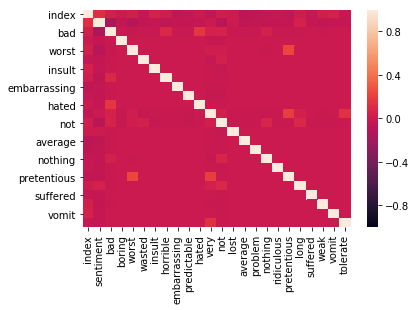

In [362]:
df_heat = sns.heatmap(df.corr(), vmin= -1)

print(df_heat)

## Using the feature variables, the Bernoulli classifer I setup below using sklearn will test how good our model is at labeling the correct sentiment with each message in our dataset.

In [363]:
data = df[keywords]
target = df['sentiment']

In [364]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

#print(y_pred)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 992 points : 411


In [365]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[113, 386],
       [ 25, 468]], dtype=int64)

### The confusion matrix above details which kind of messages our model is mislabeling.  The "386" represents the messages that had negative sentiment(0), but the model predicted them as positive sentiment(1); these represent the false positives.  The "25" represents the messages that represented positive sentiment(1), but the model predicted it as negative sentiment(0); these are the false negatives.  From this we can see that the majority of our errors are from the model predicting positive sentiment(1), when actually it was negative sentiment(0).

# Version 2:

In [366]:
keywords2 = ['bad', 'boring','worst', 'wasted', 'insult', 'horrible', 'embarrassing', 'predictable',
            'hated', 'very', 'not', 'lost', 'average', 'problem', 'nothing', 'ridiculous', 'pretentious', 
            'long', 'suffered', 'weak', 'vomit', 'tolerate', 'sloppy', 'tortured', 'rough', 'irritating',
            'idiot', 'mess', 'excuse', 'bother', 'failed', 'stupid', 'awful', 'painful', 'hypocrisy', 'rubbish', 'laughable']
            
for key2 in keywords2:

    df[str(key2)] = df.message.str.contains(
        ' ' + str(key2) + ' ',
        case=False
    )

AxesSubplot(0.125,0.125;0.62x0.755)


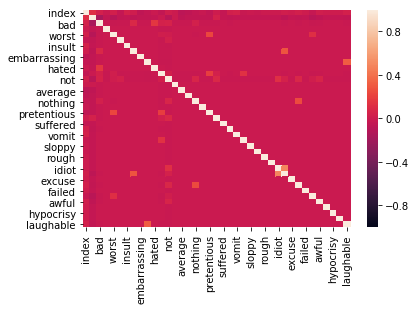

In [367]:
df_heat = sns.heatmap(df.corr(), vmin= -1)

print(df_heat)

In [368]:
data2 = df[keywords2]
target2 = df['sentiment']

In [369]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb2 = BernoulliNB()

# Fit our model to the data.
bnb2.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred2 = bnb2.predict(data2)

#print(y_pred)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))

Number of mislabeled points out of a total 992 points : 391


In [370]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target2, y_pred2)

array([[133, 366],
       [ 25, 468]], dtype=int64)

### From the confusion matrix, we see that by adding more features to this version of our classifier, specifically features that represented negative sentiment(0), the false positives decreased.

# Version 3:

In [371]:
df2 = pd.read_csv("imdb_labelled.csv", header=None)
df2.columns = ['message', 'sentiment']
df2 = df2.dropna()
df2 = df2.drop_duplicates()
df2 = df2.reset_index()

#print(df2.head())

In [372]:
keywords3 = ['great', 'good', 'well', 'fresh', 'applause', 'liked', 'great', 'nice', 'edge', 'brilliant', 'rocked', 'excellent',
             'renowned', 'incredible', 'shined', 'absolutely', 'genius', 'perfect', 'fascinated', 'music',
             'thriller', 'enjoyed', 'beautiful', 'trilogy', 'spoiler', 'stunning', 'sweet', 'funny', 'classic']
             
             
for key3 in keywords3:

    df2[str(key3)] = df2.message.str.contains(
        ' ' + str(key3) + ' ',
        case=False
    )

AxesSubplot(0.125,0.125;0.62x0.755)


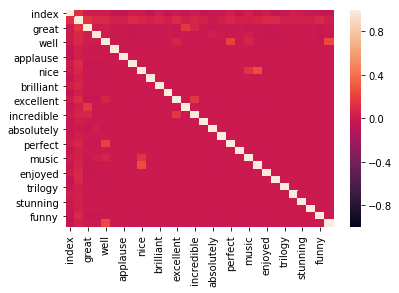

In [373]:
df_heat2 = sns.heatmap(df2.corr(), vmin= -1)

print(df_heat2)

In [374]:
data3 = df2[keywords3]
target3 = df2['sentiment']

In [375]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb3 = BernoulliNB()

# Fit our model to the data.
bnb3.fit(data3, target3)

# Classify, storing the result in a new variable.
y_pred3 = bnb3.predict(data3)

#print(y_pred)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred3).sum()
))

Number of mislabeled points out of a total 992 points : 373


In [376]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target3, y_pred3)

array([[476,  23],
       [350, 143]], dtype=int64)

### In this version, we created new features to identify good sentiment(1).  From the confusion matrix, we see that the false negatives increased; our model incorrectly predicted negative sentiment(0) when the message actually represented postive sentiment(1).

# Version 4:

In [377]:
df3 = pd.read_csv("imdb_labelled.csv", header=None)
df3.columns = ['message', 'sentiment']
df3 = df3.dropna()
df3 = df3.drop_duplicates()
df3 = df3.reset_index()

#print(df3.head())

In [378]:
keywords4 = ['bad', 'boring','worst', 'wasted', 'insult', 'horrible', 'embarrassing', 'predictable',
            'hated', 'very', 'not', 'lost', 'average', 'problem', 'nothing', 'ridiculous', 'pretentious', 
            'long', 'suffered', 'weak', 'vomit', 'tolerate', 'sloppy', 'tortured', 'rough', 'irritating',
            'idiot', 'mess', 'excuse', 'bother', 'failed', 'stupid', 'awful', 'painful', 'laughable',
            'great', 'well', 'fresh', 'applause', 'liked', 'great', 'nice', 'edge', 'brilliant', 'rocked', 'excellent',
            'renowned', 'incredible', 'shined', 'absolutely', 'genius', 'perfect', 'fascinated', 'music',
            'thriller', 'enjoyed', 'beautiful', 'trilogy', 'spoiler', 'stunning', 'sweet', 'funny', 'classic']
            
            
for key4 in keywords4:

    df3[str(key4)] = df3.message.str.contains(
        ' ' + str(key4) + ' ',
        case=False
    )


AxesSubplot(0.125,0.125;0.62x0.755)


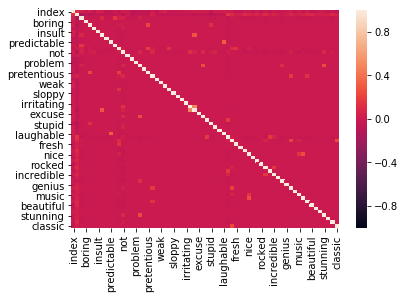

In [379]:
df_heat3 = sns.heatmap(df3.corr(), vmin= -1)

print(df_heat3)

In [380]:
data4 = df3[keywords4]
target4 = df3['sentiment']

In [381]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb4 = BernoulliNB()

# Fit our model to the data.
bnb4.fit(data4, target4)

# Classify, storing the result in a new variable.
y_pred4 = bnb4.predict(data4)

#print(y_pred)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != y_pred4).sum()
))

Number of mislabeled points out of a total 992 points : 386


In [382]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target4, y_pred4)

array([[489,  10],
       [376, 117]], dtype=int64)

### For this version, I combined the positive and negative keyword features with the hope of creating a more accurate model.  From the confusion matrix, we see that the false negatives and true positives stayed consistent.

# Cross Validation

#### Version 1

In [383]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.59      , 0.57      , 0.54      , 0.55555556, 0.58585859,
       0.5959596 , 0.58585859, 0.60606061, 0.54545455, 0.60204082])

#### Version 2

In [384]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb2, data2, target2, cv=10)

array([0.59      , 0.57      , 0.55      , 0.55555556, 0.60606061,
       0.61616162, 0.61616162, 0.61616162, 0.56565657, 0.60204082])

#### Version 3

In [385]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb3, data3, target3, cv=10)

array([0.59      , 0.65      , 0.65      , 0.63636364, 0.60606061,
       0.66666667, 0.63636364, 0.58585859, 0.54545455, 0.55102041])

#### Version 4

In [386]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb4, data4, target4, cv=10)

array([0.55      , 0.66      , 0.63      , 0.5959596 , 0.58585859,
       0.65656566, 0.60606061, 0.55555556, 0.55555556, 0.57142857])

## Question 1:

I don't think any of the classifier's are overfit.  However, some of them, such as version 4, may be underfit.

## Question 2: 

Version 3 seems to perform the best, because we increased our features to better identify negative sentiments.

## Question 3:

The features that have less correlation amongst each other, but instead can demonstrate a strong underlying relationship with our outcome variable seem to perform the best.